Hier wird das Modell erstellt um den Forecast Error möglichst genau zu schätzen, gewollt ist hier nach oben
- Im ersten Schritt schauen wir mal wie viel wir vom Forecast Error erklären können

In [7]:
import sys
print(sys.executable)


C:\Users\janth\AppData\Local\Programs\Python\Python311\python.exe


In [8]:
import pandas as pd

In [9]:
from bachelorarbeit import config


In [10]:
!where python

C:\Users\janth\AppData\Local\Programs\Python\Python311\python.exe
C:\Users\janth\AppData\Local\Microsoft\WindowsApps\python.exe


In [11]:
ünb = ["DE_50HZ", "DE_TENNET", "DE_AMPRION", "DE_TRANSNET"]


Basic Dateien laden:

In [12]:
df = pd.read_csv("load_forecast_error.csv", index_col=0, parse_dates=True)
df.index = pd.to_datetime(df.index, format="%d.%m.%Y %H:%M", utc=True)
df

,AT,BE,CH,CZ,DE_50HZ,DE_AMPRION,DE_TENNET,DE_TRANSNET,DK_1,DK_2,...,NO_3,NO_4,NO_5,PL,PT,SE_1,SE_2,SE_3,SE_4,SI
timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01 00:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01 00:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-17 21:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-17 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-17 22:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
def load_and_format(path):
    print(path)
    df = pd.read_csv(path, index_col=0, parse_dates=True)
    df.index = pd.to_datetime(df.index, format="%d.%m.%Y %H:%M", utc=True)
    df = df[ünb]
    start = pd.Timestamp("2022-1-01 00:00:00", tz="UTC")
    df = df.loc[start:]
    return df

In [14]:
df_solar = load_and_format("B16_forecast_error_da.csv")
df_wind_on = load_and_format("B18_forecast_error_da.csv")
df_wind_off = load_and_format("B19_forecast_error_da.csv")
df_residual = load_and_format("residual_load_forecast_error_da.csv")
df = load_and_format("load_forecast_error.csv")

B16_forecast_error_da.csv
B18_forecast_error_da.csv
B19_forecast_error_da.csv
residual_load_forecast_error_da.csv
load_forecast_error.csv


In [15]:
df

,DE_50HZ,DE_TENNET,DE_AMPRION,DE_TRANSNET
timestamp,,,,
2022-01-01 00:00:00+00:00,877.28,-484.23,1317.84,-309.75
2022-01-01 00:15:00+00:00,1002.00,-408.57,1350.18,-344.33
2022-01-01 00:30:00+00:00,799.24,-275.66,1149.35,-358.39
2022-01-01 00:45:00+00:00,862.12,-197.08,1122.93,-381.48
2022-01-01 01:00:00+00:00,992.11,44.37,985.59,-75.47
...,...,...,...,...
2025-01-17 21:45:00+00:00,NaN,NaN,NaN,NaN
2025-01-17 22:00:00+00:00,NaN,NaN,NaN,NaN
2025-01-17 22:15:00+00:00,NaN,NaN,NaN,NaN


In [16]:
df_wind_on

,DE_50HZ,DE_TENNET,DE_AMPRION,DE_TRANSNET
timestamp,,,,
2022-01-01 00:00:00+00:00,-79.63,-467.43,NaN,0
2022-01-01 00:15:00+00:00,-110.46,-337.86,NaN,0
2022-01-01 00:30:00+00:00,-86.91,-385.99,NaN,0
2022-01-01 00:45:00+00:00,90.19,-499.59,NaN,0
2022-01-01 01:00:00+00:00,125.61,-682.84,NaN,0
...,...,...,...,...
2025-01-10 19:45:00+00:00,51.93,NaN,NaN,0
2025-01-10 20:00:00+00:00,56.46,NaN,NaN,0
2025-01-10 20:15:00+00:00,55.33,NaN,NaN,0


Es kann hier analysiert werden, dass die NaN einheitlich am ende auftreten, daher könnte man die Daten hier einfach abschneiden

In [17]:
df_wind_on

,DE_50HZ,DE_TENNET,DE_AMPRION,DE_TRANSNET
timestamp,,,,
2022-01-01 00:00:00+00:00,-79.63,-467.43,NaN,0
2022-01-01 00:15:00+00:00,-110.46,-337.86,NaN,0
2022-01-01 00:30:00+00:00,-86.91,-385.99,NaN,0
2022-01-01 00:45:00+00:00,90.19,-499.59,NaN,0
2022-01-01 01:00:00+00:00,125.61,-682.84,NaN,0
...,...,...,...,...
2025-01-10 19:45:00+00:00,51.93,NaN,NaN,0
2025-01-10 20:00:00+00:00,56.46,NaN,NaN,0
2025-01-10 20:15:00+00:00,55.33,NaN,NaN,0


In [18]:
df_wind_off

,DE_50HZ,DE_TENNET,DE_AMPRION,DE_TRANSNET
timestamp,,,,
2022-01-01 00:00:00+00:00,-336.41,3459.88,-1466.00,706.00
2022-01-01 00:15:00+00:00,-135.12,3024.31,-1624.00,640.00
2022-01-01 00:30:00+00:00,29.86,2431.27,-1788.00,583.00
2022-01-01 00:45:00+00:00,-341.83,2074.25,-1940.00,566.00
2022-01-01 01:00:00+00:00,34.17,1717.54,-2109.00,568.00
...,...,...,...,...
2025-01-10 19:45:00+00:00,631.33,NaN,-2232.43,42.16
2025-01-10 20:00:00+00:00,664.25,NaN,-2217.18,34.45
2025-01-10 20:15:00+00:00,777.07,NaN,-2191.18,25.86


In [19]:
df_solar

,DE_50HZ,DE_TENNET,DE_AMPRION,DE_TRANSNET
timestamp,,,,
2022-01-01 00:00:00+00:00,0.0,1.38,0.0,0.0
2022-01-01 00:15:00+00:00,0.0,1.39,0.0,0.0
2022-01-01 00:30:00+00:00,0.0,1.43,0.0,0.0
2022-01-01 00:45:00+00:00,0.0,1.49,0.0,0.0
2022-01-01 01:00:00+00:00,0.0,1.46,-1.0,0.0
...,...,...,...,...
2025-01-10 19:45:00+00:00,0.0,NaN,0.0,0.0
2025-01-10 20:00:00+00:00,0.0,NaN,0.0,0.0
2025-01-10 20:15:00+00:00,0.0,NaN,0.0,0.0


In [20]:
df_residual

,DE_50HZ,DE_TENNET,DE_AMPRION,DE_TRANSNET
timestamp,,,,
2022-01-01 00:00:00+00:00,1288.45,-955.06,1886.84,-422.75
2022-01-01 00:15:00+00:00,1240.35,-836.41,1839.18,-412.33
2022-01-01 00:30:00+00:00,846.26,-331.37,1549.35,-393.39
2022-01-01 00:45:00+00:00,1120.21,-68.23,1413.93,-422.48
2022-01-01 01:00:00+00:00,852.17,433.21,1189.59,-141.47
...,...,...,...,...
2025-01-17 21:45:00+00:00,NaN,NaN,NaN,NaN
2025-01-17 22:00:00+00:00,NaN,NaN,NaN,NaN
2025-01-17 22:15:00+00:00,NaN,NaN,NaN,NaN


ok bei wind on und off fehlt bei Amprion daten, daher können wir die hier nicht verwenden, ich probiere die möglichst genau über den gesamten forecast zu schätzen, mal schauen was wird ....

gut und ich muss hier darauf warten das ich die generierten Daten habe, außerdem sollte ich auch noch die dayahead Daten laden!!

Wetter Daten sind außerdem interessant

Gradienten sind auch wichtig

In [21]:
df = df.dropna()
df

,DE_50HZ,DE_TENNET,DE_AMPRION,DE_TRANSNET
timestamp,,,,
2022-01-01 00:00:00+00:00,877.28,-484.23,1317.84,-309.75
2022-01-01 00:15:00+00:00,1002.00,-408.57,1350.18,-344.33
2022-01-01 00:30:00+00:00,799.24,-275.66,1149.35,-358.39
2022-01-01 00:45:00+00:00,862.12,-197.08,1122.93,-381.48
2022-01-01 01:00:00+00:00,992.11,44.37,985.59,-75.47
...,...,...,...,...
2025-01-10 16:00:00+00:00,1816.80,-399.80,1168.82,23.45
2025-01-10 16:15:00+00:00,1625.56,-351.88,876.45,176.75
2025-01-10 16:30:00+00:00,1510.71,-494.85,475.35,180.34


In [22]:
from datetime import date
import os
import sys

Hier werden die Wetterdaten geladen und geschaut wie diese mit den Daten zusammenhängen

In [23]:
sys.path.append(os.path.abspath("../../../Nodebooks/"))
from Parameter.Wetter.Wetterdate import get_weather_data_wind
from Parameter.Wetter.Wetterdate import get_weather_data_solar
df_wind = get_weather_data_wind(date(2022, 1, 1), date(2025, 5, 1))
df_solar = get_weather_data_solar(date(2022, 1, 1), date(2025, 5, 1))


In [24]:
df_wind.columns

Index(['wind_speed_100m_50HZ', 'wind_gusts_10m_50HZ',
       'wind_speed_100m_Amprion', 'wind_gusts_10m_Amprion',
       'wind_speed_100m_TransnetBW', 'wind_gusts_10m_TransnetBW',
       'wind_speed_100m_TenneT1', 'wind_gusts_10m_TenneT1'],
      dtype='object')

In [25]:
#Mal schauen ob das mehr erklärt
#df_wind_50HZ = df_wind.filter(regex='50HZ$')
#df_solar_50HZ = df_solar.filter(regex='50HZ$')
df_solar_50HZ = df_solar
df_wind_50HZ = df_wind

In [26]:
merged = df.join(df_wind)
merged = merged.join(df_solar)
x = merged.drop(columns=["DE_50HZ", "DE_TENNET", "DE_AMPRION", "DE_TRANSNET"])
y = merged["DE_50HZ"]

In [27]:
from bachelorarbeit import Modelle
model = Modelle.LinearRegression(x,y)

Lineare Regression wurde ausgeführt mit 106149 an Einträgen, für 24 verschiedene Variablen


In [28]:
print("MSE:", model.mse)
print("R²:", model.r2)

Achtung: x_test oder y_test ist nicht übergeben worden.
Fortfahren...


TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

Es lässt sich offensichtlich schlussfolgern, dass wir keinen linearen Zusammenhang haben

In [34]:
from bachelorarbeit import Modelle
model = Modelle.XGBoostRegression(x,y,n_estimators=500, max_depth=8, train_test_split=True, val=True)


XGBoost wurde ausgeführt mit 106149 an Einträgen, für 24 verschiedene Variablen
(67935, 24)
(67935,)
(21230, 24)
(21230,)
(16984, 24)
(16984,)
Model wird trainiert
[0]	validation_0-rmse:1261.70814
[100]	validation_0-rmse:766.93416
[200]	validation_0-rmse:646.42439
[300]	validation_0-rmse:564.37004
[400]	validation_0-rmse:513.91345
[499]	validation_0-rmse:480.08941


In [35]:
print("MSE:", model.mse)
print("R²:", model.r2)
print("rmse:", model.rmse)

MSE: 225938.30403822797
R²: 0.8658669101026788
rmse: 475.3296793155546


In [36]:
model.get_performance_bins()

timestamp
2022-08-30 00:15:00+00:00     193.24
2024-10-21 03:30:00+00:00     715.39
2022-01-21 04:30:00+00:00    4091.67
2022-06-17 23:30:00+00:00     683.90
2024-07-20 11:00:00+00:00   -1587.66
                              ...   
2023-02-23 01:15:00+00:00    -385.45
2024-02-21 16:15:00+00:00     302.55
2024-08-10 11:45:00+00:00   -1393.24
2022-12-10 00:15:00+00:00    -690.08
2023-08-04 01:00:00+00:00    -878.98
Name: DE_50HZ, Length: 21230, dtype: float64
[  277.8938  1234.9808  3636.6812 ... -1036.4506  -799.6309  -688.7413]
Formel: y_true - y_pred


,count,mean,std,min,max
y_test_bins,,,,,
0,57,-923.388418,664.781586,-2608.973091,91.457305
1,222,-933.562839,692.332738,-3040.326953,465.045234
2,610,-669.262463,564.504708,-2944.469169,541.388086
3,3051,-378.889453,385.062673,-2617.299768,1029.025264
4,6619,-100.916168,336.175932,-2003.383477,1546.396870
5,6479,167.684141,350.817357,-1752.898052,2374.320537
6,3155,321.043491,401.985838,-1614.354258,2259.248977
7,941,429.787076,457.494975,-797.794219,2491.676891
8,93,587.974830,534.431709,-464.553525,2044.219658


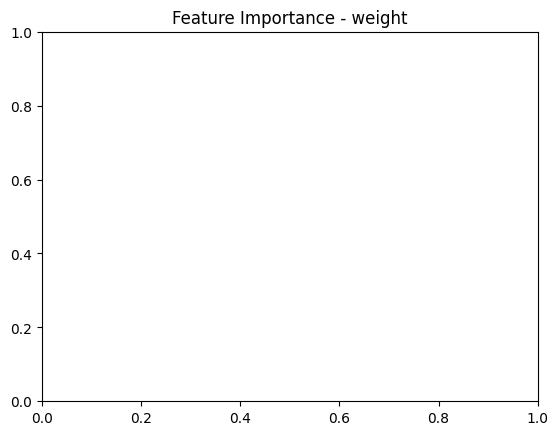

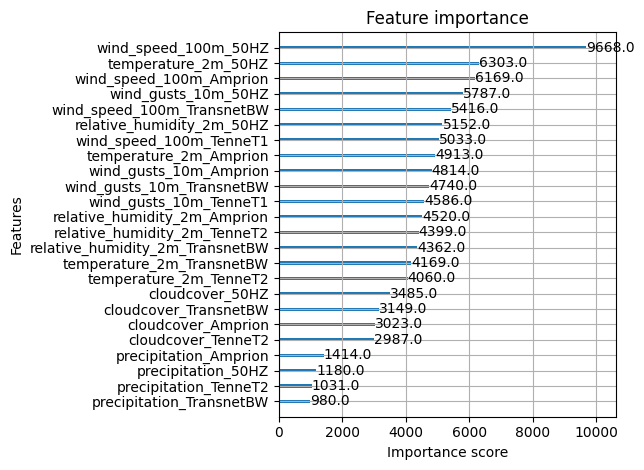

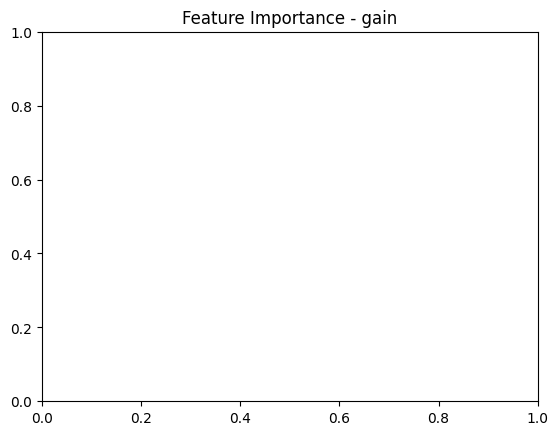

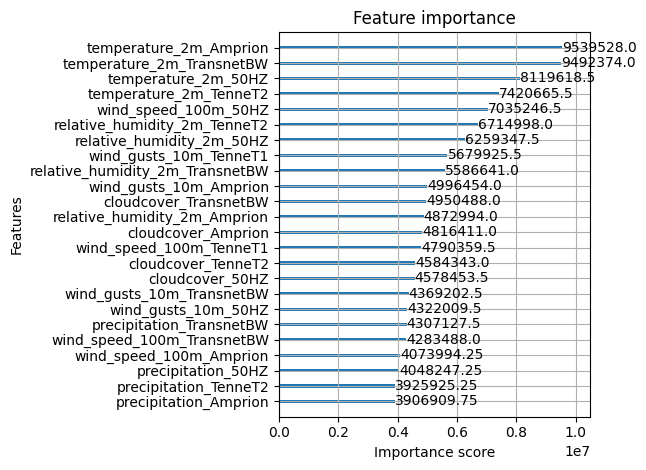

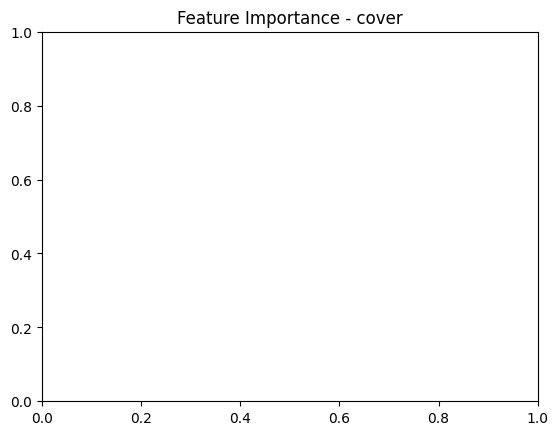

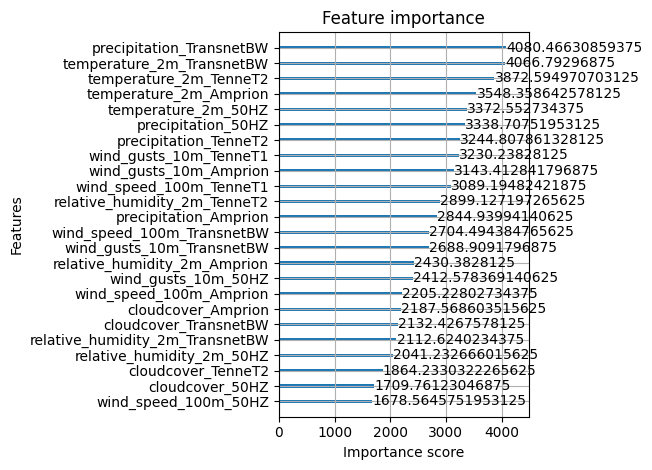

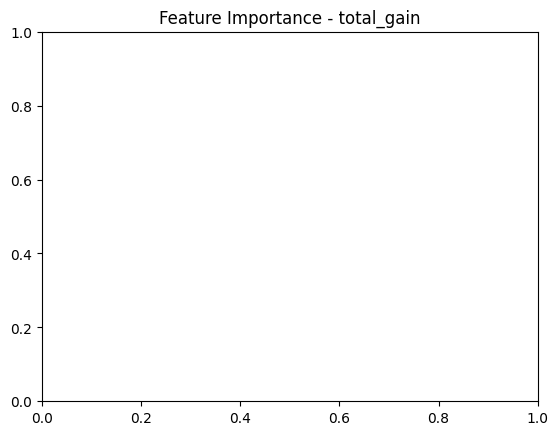

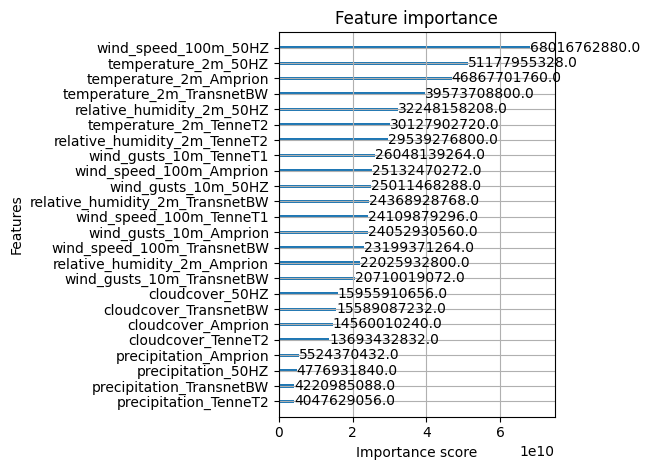

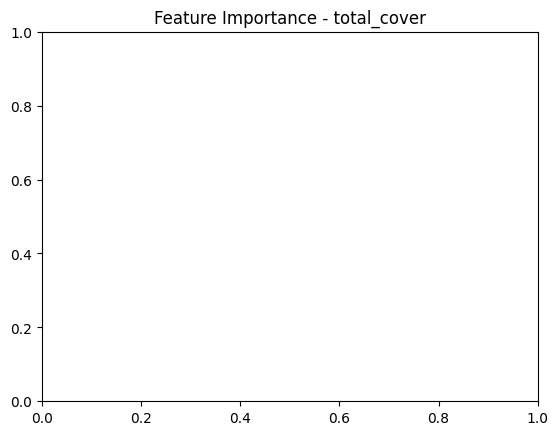

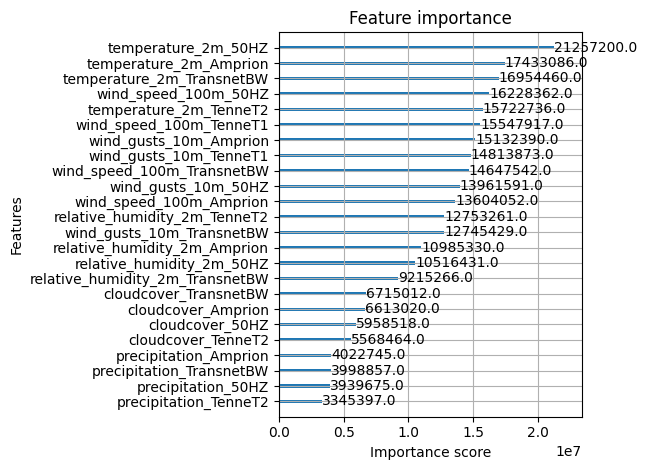

[('weight',
  {'wind_speed_100m_50HZ': 9668.0,
   'wind_gusts_10m_50HZ': 5787.0,
   'wind_speed_100m_Amprion': 6169.0,
   'wind_gusts_10m_Amprion': 4814.0,
   'wind_speed_100m_TransnetBW': 5416.0,
   'wind_gusts_10m_TransnetBW': 4740.0,
   'wind_speed_100m_TenneT1': 5033.0,
   'wind_gusts_10m_TenneT1': 4586.0,
   'cloudcover_50HZ': 3485.0,
   'temperature_2m_50HZ': 6303.0,
   'relative_humidity_2m_50HZ': 5152.0,
   'precipitation_50HZ': 1180.0,
   'cloudcover_Amprion': 3023.0,
   'temperature_2m_Amprion': 4913.0,
   'relative_humidity_2m_Amprion': 4520.0,
   'precipitation_Amprion': 1414.0,
   'cloudcover_TransnetBW': 3149.0,
   'temperature_2m_TransnetBW': 4169.0,
   'relative_humidity_2m_TransnetBW': 4362.0,
   'precipitation_TransnetBW': 980.0,
   'cloudcover_TenneT2': 2987.0,
   'temperature_2m_TenneT2': 4060.0,
   'relative_humidity_2m_TenneT2': 4399.0,
   'precipitation_TenneT2': 1031.0}),
 ('gain',
  {'wind_speed_100m_50HZ': 7035246.5,
   'wind_gusts_10m_50HZ': 4322009.5,
   'wi

In [38]:
model.get_feature_importance("all")

Wir können auch hier sehen, dass wir nur einen kleinen Anteil aus den Wetterdaten eklären können


In [40]:
from bachelorarbeit.Parameter.Gradienten.Gradienten import get_gradient

df_gradient = get_gradient(start=config.Config.start_date, end=config.Config.end_date, ünb=config.ünb[0])
df_gradient

Gradienten laden: 100%|██████████| 1/1 [00:01<00:00,  1.58s/it]


,B02_DE_50HZ,B04_DE_50HZ,B05_DE_50HZ,B10_DE_50HZ,B12_DE_50HZ,B14_DE_50HZ,B16_DE_50HZ,B18_DE_50HZ,B19_DE_50HZ
timestamp,,,,,,,,,
2020-01-01 00:00:00+00:00,37.34,0.12,-0.53,541.40,NaN,0,0.0,95.99,-170.30
2020-01-01 00:15:00+00:00,16.00,5.62,-0.47,11.46,NaN,0,0.0,145.96,-360.94
2020-01-01 00:30:00+00:00,5.11,-1.20,0.80,0.07,NaN,0,0.0,-3.73,17.62
2020-01-01 00:45:00+00:00,27.57,-3.81,0.27,38.00,NaN,0,0.0,24.62,14.48
2020-01-01 01:00:00+00:00,59.75,-11.67,-0.60,1528.27,NaN,0,0.0,20.80,-73.97
...,...,...,...,...,...,...,...,...,...
2025-01-10 19:45:00+00:00,5.05,-24.59,-11.30,NaN,NaN,0,0.0,29.90,3.25
2025-01-10 20:00:00+00:00,-116.64,-129.26,-37.66,NaN,NaN,0,0.0,4.32,-31.70
2025-01-10 20:15:00+00:00,-61.66,-159.43,-7.82,-66.30,NaN,0,0.0,-1.31,47.69


In [41]:
merged = merged.join(df_gradient)

In [42]:
merged.to_csv("50HZ_forecast_error_data.csv")

In [43]:
merged

,DE_50HZ,DE_TENNET,DE_AMPRION,DE_TRANSNET,wind_speed_100m_50HZ,wind_gusts_10m_50HZ,wind_speed_100m_Amprion,wind_gusts_10m_Amprion,wind_speed_100m_TransnetBW,wind_gusts_10m_TransnetBW,...,precipitation_TenneT2,B02_DE_50HZ,B04_DE_50HZ,B05_DE_50HZ,B10_DE_50HZ,B12_DE_50HZ,B14_DE_50HZ,B16_DE_50HZ,B18_DE_50HZ,B19_DE_50HZ
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00+00:00,877.28,-484.23,1317.84,-309.75,31.00,39.200,34.600,38.500,25.10,23.800,...,0.0,24.49,5.28,5.66,24.00,NaN,0,0.0,141.94,-281.82
2022-01-01 00:15:00+00:00,1002.00,-408.57,1350.18,-344.33,31.45,38.225,34.675,38.775,24.35,23.075,...,0.0,-31.92,6.65,3.67,-18.00,NaN,0,0.0,-27.06,204.75
2022-01-01 00:30:00+00:00,799.24,-275.66,1149.35,-358.39,31.90,37.250,34.750,39.050,23.60,22.350,...,0.0,12.23,2.46,-6.13,1.00,NaN,0,0.0,27.20,171.36
2022-01-01 00:45:00+00:00,862.12,-197.08,1122.93,-381.48,32.35,36.275,34.825,39.325,22.85,21.625,...,0.0,27.06,4.27,-1.71,-1.00,NaN,0,0.0,180.28,-381.32
2022-01-01 01:00:00+00:00,992.11,44.37,985.59,-75.47,32.80,35.300,34.900,39.600,22.10,20.900,...,0.0,-51.55,3.82,-1.36,8.00,NaN,0,0.0,37.59,353.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-10 16:00:00+00:00,1816.80,-399.80,1168.82,23.45,26.70,32.800,26.900,31.300,9.60,22.000,...,0.0,-124.14,37.05,-2.23,61.47,NaN,0,0.0,13.43,-18.60
2025-01-10 16:15:00+00:00,1625.56,-351.88,876.45,176.75,27.30,32.525,27.275,31.125,8.95,20.200,...,0.0,7.83,25.51,3.60,18.40,NaN,0,0.0,32.83,-28.37
2025-01-10 16:30:00+00:00,1510.71,-494.85,475.35,180.34,27.90,32.250,27.650,30.950,8.30,18.400,...,0.0,-1.01,12.65,-1.12,-5.21,NaN,0,0.0,-0.01,-92.03


In [44]:
x = merged.drop(columns=["DE_50HZ", "DE_TENNET", "DE_AMPRION", "DE_TRANSNET"])
y = merged["DE_50HZ"]

In [45]:
y.describe()

count    106149.000000
mean        100.051381
std        1305.816120
min       -5800.730000
25%        -750.810000
50%         105.390000
75%         953.860000
max        5538.710000
Name: DE_50HZ, dtype: float64

C:\Users\janth\AppData\Local\Temp\ipykernel_24548\1533662534.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([y], labels=["Forecast Error"], patch_artist=True,


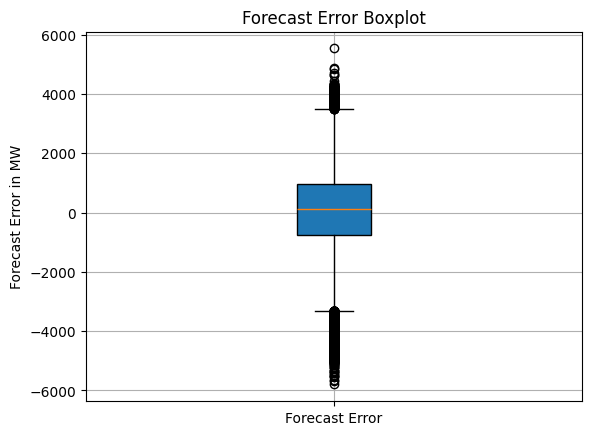

In [46]:
import matplotlib.pyplot as plt

# Boxplot mit Ausreißern
plt.boxplot([y], labels=["Forecast Error"], patch_artist=True,
            showfliers=True)
plt.title("Forecast Error Boxplot")
plt.ylabel("Forecast Error in MW")
plt.grid(True)
plt.show()

In [52]:
from bachelorarbeit import Modelle
model1 = Modelle.XGBoostRegression(x,y,n_estimators=1000, max_depth=12, train_test_split=True)

XGBoost wurde ausgeführt mit 106149 an Einträgen, für 33 verschiedene Variablen
(67935, 33)
(67935,)
(21230, 33)
(21230,)
(16984, 33)
(16984,)
Model wird trainiert
[0]	validation_0-rmse:1233.23947
[100]	validation_0-rmse:523.82614
[200]	validation_0-rmse:469.94543
[300]	validation_0-rmse:457.01819
[400]	validation_0-rmse:452.83616
[500]	validation_0-rmse:451.12132
[600]	validation_0-rmse:450.47444
[700]	validation_0-rmse:450.13729
[800]	validation_0-rmse:449.96281
[900]	validation_0-rmse:449.88345
[999]	validation_0-rmse:449.83549


In [53]:
print("MSE:", model1.mse)
print("R²:", model1.r2)
print("rmse:", model1.rmse)

MSE: 201891.51394641708
R²: 0.880142799579928
rmse: 449.32339572563666


In [51]:
print(model1.get_performance_bins())

timestamp
2022-08-30 00:15:00+00:00     193.24
2024-10-21 03:30:00+00:00     715.39
2022-01-21 04:30:00+00:00    4091.67
2022-06-17 23:30:00+00:00     683.90
2024-07-20 11:00:00+00:00   -1587.66
                              ...   
2023-02-23 01:15:00+00:00    -385.45
2024-02-21 16:15:00+00:00     302.55
2024-08-10 11:45:00+00:00   -1393.24
2022-12-10 00:15:00+00:00    -690.08
2023-08-04 01:00:00+00:00    -878.98
Name: DE_50HZ, Length: 21230, dtype: float64
[ 264.95877  998.78766 3463.033   ... -719.90063 -832.4834  -670.24524]
Formel: y_true - y_pred
             count         mean         std          min          max
y_test_bins                                                          
0               57  -986.699395  614.847780 -2295.416050   -90.776094
1              222  -947.864337  687.891487 -3173.332336   759.902715
2              610  -711.797195  570.930738 -2939.976657   887.865918
3             3051  -390.995873  372.954144 -2420.453386  1145.386152
4             6619  -1

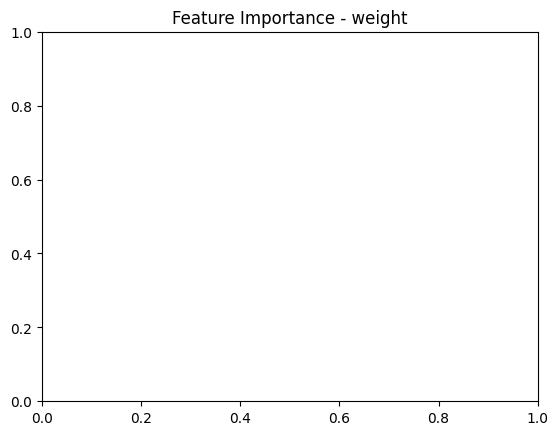

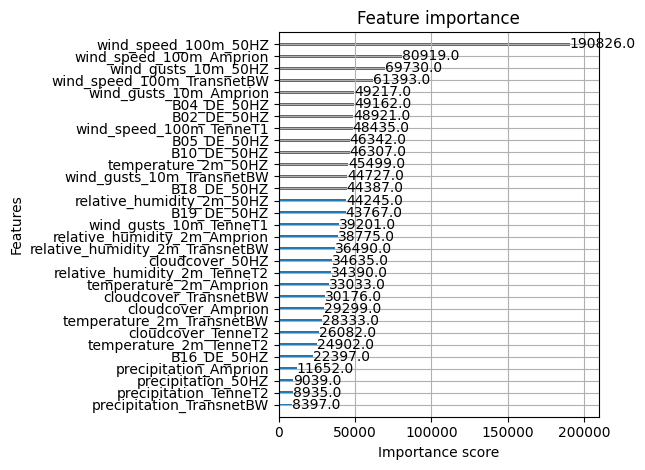

{'wind_speed_100m_50HZ': 190826.0, 'wind_gusts_10m_50HZ': 69730.0, 'wind_speed_100m_Amprion': 80919.0, 'wind_gusts_10m_Amprion': 49217.0, 'wind_speed_100m_TransnetBW': 61393.0, 'wind_gusts_10m_TransnetBW': 44727.0, 'wind_speed_100m_TenneT1': 48435.0, 'wind_gusts_10m_TenneT1': 39201.0, 'cloudcover_50HZ': 34635.0, 'temperature_2m_50HZ': 45499.0, 'relative_humidity_2m_50HZ': 44245.0, 'precipitation_50HZ': 9039.0, 'cloudcover_Amprion': 29299.0, 'temperature_2m_Amprion': 33033.0, 'relative_humidity_2m_Amprion': 38775.0, 'precipitation_Amprion': 11652.0, 'cloudcover_TransnetBW': 30176.0, 'temperature_2m_TransnetBW': 28333.0, 'relative_humidity_2m_TransnetBW': 36490.0, 'precipitation_TransnetBW': 8397.0, 'cloudcover_TenneT2': 26082.0, 'temperature_2m_TenneT2': 24902.0, 'relative_humidity_2m_TenneT2': 34390.0, 'precipitation_TenneT2': 8935.0, 'B02_DE_50HZ': 48921.0, 'B04_DE_50HZ': 49162.0, 'B05_DE_50HZ': 46342.0, 'B10_DE_50HZ': 46307.0, 'B16_DE_50HZ': 22397.0, 'B18_DE_50HZ': 44387.0, 'B19_DE_5

In [54]:
print(model1.get_feature_importance())

Wir probieren jetzt mal die unteren und oberen Quantile ab zu scheiden:


In [57]:
lower = merged["DE_50HZ"].quantile(0.015)
upper = merged["DE_50HZ"].quantile(0.985)

df_trimmed = merged[(merged["DE_50HZ"] >= lower) & (merged["DE_50HZ"] <= upper)]

In [60]:
x = df_trimmed.drop(columns="DE_50HZ")
y = df_trimmed["DE_50HZ"]

In [61]:
from bachelorarbeit import Modelle

model2 = Modelle.XGBoostRegression(x,y,n_estimators=500, max_depth=12, train_test_split=True)

XGBoost wurde ausgeführt mit 102963 an Einträgen, für 36 verschiedene Variablen
(65896, 36)
(65896,)
(20593, 36)
(20593,)
(16474, 36)
(16474,)
Model wird trainiert
[0]	validation_0-rmse:1105.97680
[100]	validation_0-rmse:440.97213
[200]	validation_0-rmse:396.71862
[300]	validation_0-rmse:386.98702
[400]	validation_0-rmse:383.96568
[499]	validation_0-rmse:382.66133


In [62]:
print("MSE:", model2.mse)
print("R²:", model2.r2)
print("rmse:", model2.rmse)

MSE: 148971.7546444582
R²: 0.8914575534166664
rmse: 385.96859282130487


Kurz gesagt die Varianz lässt sich gut erklären, die höhe aber nicht, siehe rmse, daher bietet sich an der Stelle nur BART oder MCMC an um hier verlässliche Ergebnisse sammeln zu können

Gleichzeitig können wir daraus auch schlussfolgern, dass wir die Wetterdaten damit nicht aus dem BART Modell herausstreichen können, weil wir der Forecast Error somit im prediction Modell nicht genügend Aussagekraft haben wird...? Diese Hypothese überprüfen